# Introduction

We are presenting a project aimed towards predicting whether or not a patient has diabetes.
The diabetes data set used consists of 9 features and 768 instances.
An explenation of the data set and features can be found at: https://www.kaggle.com/uciml/pima-indians-diabetes-database

An important note to understand before looking over our work is that our dataset only consists of women over the age of 21 and 
who are of pima indian heritage.

# 1a. Loading Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SequentialFeatureSelector , RFE

In [2]:
# laoding dataset
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 1b. Splitting to Training and Test Data tests
we are splitting our data 80/20 train to test

In [3]:
# Splitting to training set - for the modeling
# df_final_test - saved for the final test after model is choesen
df, df_final_test = train_test_split(df, test_size=0.2, random_state=42)
# Setting Random seed
r_seed = 42

In [4]:
len(df.index)

614

From here we continue with our training data of 614 instances leaving the rest for the final test.

# 2. EDA
At this point we will take our first look at the dataset, we will look at the following:<br>
    - General Distribution of our target variable in the data set<br>
    - Basic statistical elements of each feature<br>
    - Initial feature correlation to the target variable<br>

## 2a.General EDA

##### First Glance at target variable Distribution

<AxesSubplot:title={'center':'Number of Woman With and Without Diabetes'}, xlabel='Diabetes', ylabel='Amount'>

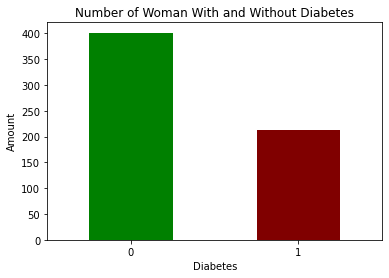

In [5]:
# Target Variable = Outcome
df['Outcome'].value_counts().plot(kind='bar', title = "Number of Woman With and Without Diabetes", color = ['g','maroon'],
                                  rot= 0,xlabel = "Diabetes", ylabel="Amount")

In [6]:
# Checking the percentage of positive cases in our data  
positive_percentage = df['Outcome'].sum()/df.shape[0]
print('The ratio of instances positive for diabeties in our datset: {:.2f}% which is not an accurate representation\nof the global level'.format(positive_percentage*100))

The ratio of instances positive for diabeties in our datset: 34.69% which is not an accurate representation
of the global level


##### Statistical ditribution of features

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.742671,120.855049,69.415309,20.399023,81.438111,31.983388,0.469168,32.907166,0.346906
std,3.313264,32.035057,18.512599,15.433974,116.234835,7.740625,0.336847,11.503437,0.476373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,129.750000,36.375000,0.613750,40.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Correlation to Target Variable

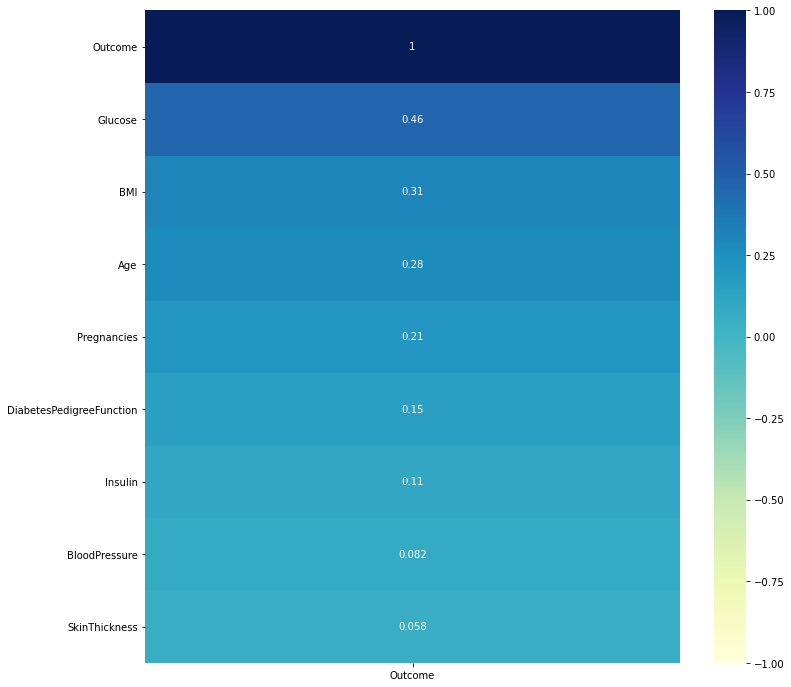

In [8]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr()[["Outcome"]].sort_values("Outcome").tail(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

##### Heat Maps showing Correlations Between all Features

<AxesSubplot:>

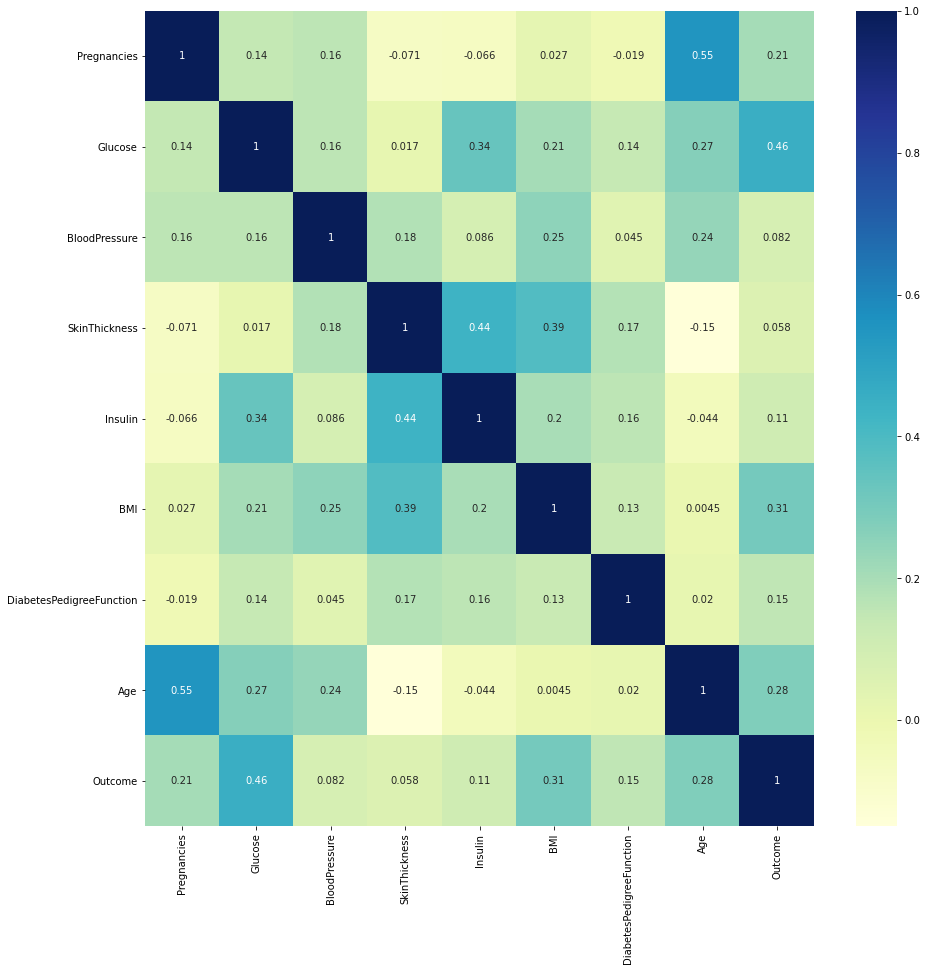

In [9]:
# Pearson Correlation
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu",annot=True)

<AxesSubplot:>

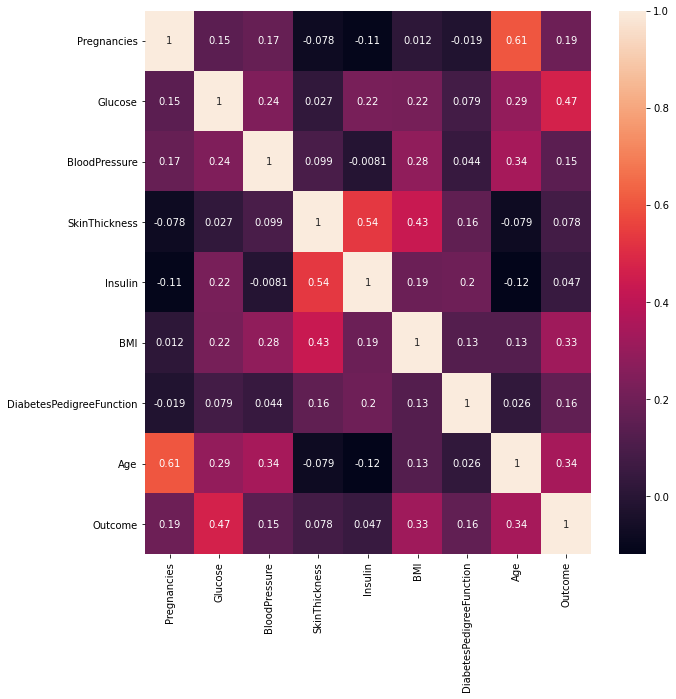

In [10]:
# spearman correlation
corr = df.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="rocket",annot=True)

##### Feature Distributions

## 2b. Specific Glance at Each Feature in Regard to the Target Variable

##### Pregnancies

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '17')])

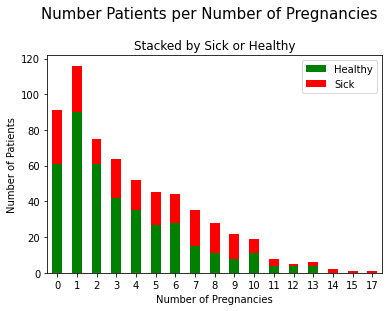

In [11]:
po0 = df[df['Outcome']==0][['Pregnancies','Outcome']].groupby('Pregnancies').count() # Number of P vs Amount not sick
po1 = df[df['Outcome']==1][['Pregnancies','Outcome']].groupby('Pregnancies').count() # Number of P vs Amount sick

po0.rename(columns = {'Outcome':'Healthy'}, inplace = True)
po1.rename(columns = {'Outcome':'Sick'}, inplace = True)

PO = pd.merge(po0,po1,on='Pregnancies',how='outer') # Merging the two df's to have number of pregnancies and the amount of healthy and sick

# Very simple one-liner using our agg_tips DataFrame.
#PO.plot(kind='bar',color = ['green','red'],stacked=True)
PO.plot(kind='bar',color = ['green','red'],stacked=True)
# Just add a title and rotate the x-axis labels to be horizontal.
plt.suptitle('Number Patients per Number of Pregnancies', y=1.05, fontsize=15)
plt.title('Stacked by Sick or Healthy')
plt.xlabel("Number of Pregnancies")
plt.ylabel("Number of Patients")
plt.xticks(rotation=0, ha='center')

##### Glucose 

Text(0, 0.5, 'Glucose Level')

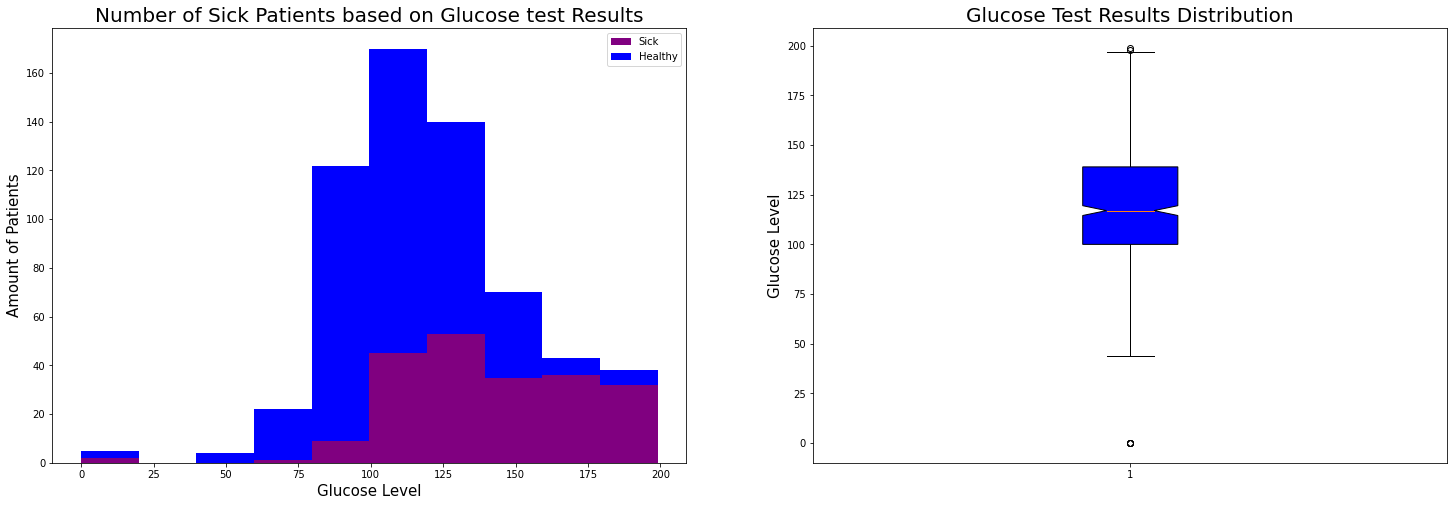

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,8))
ax1.hist([df[df['Outcome']==1]['Glucose'],
          df[df['Outcome']==0]['Glucose']], stacked=True, 
          label=['Sick','Healthy'], color = ['purple','blue'])
ax1.set_title('Number of Sick Patients based on Glucose test Results', fontsize=20)
ax1.set_xlabel("Glucose Level", fontsize = 15)
ax1.set_ylabel("Amount of Patients", fontsize =15)
ax1.legend()

ax2.boxplot(df['Glucose'],notch=True,patch_artist=True,boxprops=dict(facecolor="blue"))
ax2.set_title('Glucose Test Results Distribution', fontsize=20)
ax2.set_ylabel("Glucose Level", fontsize =15)

##### Blood Pressure

Text(0, 0.5, 'BloodPressure')

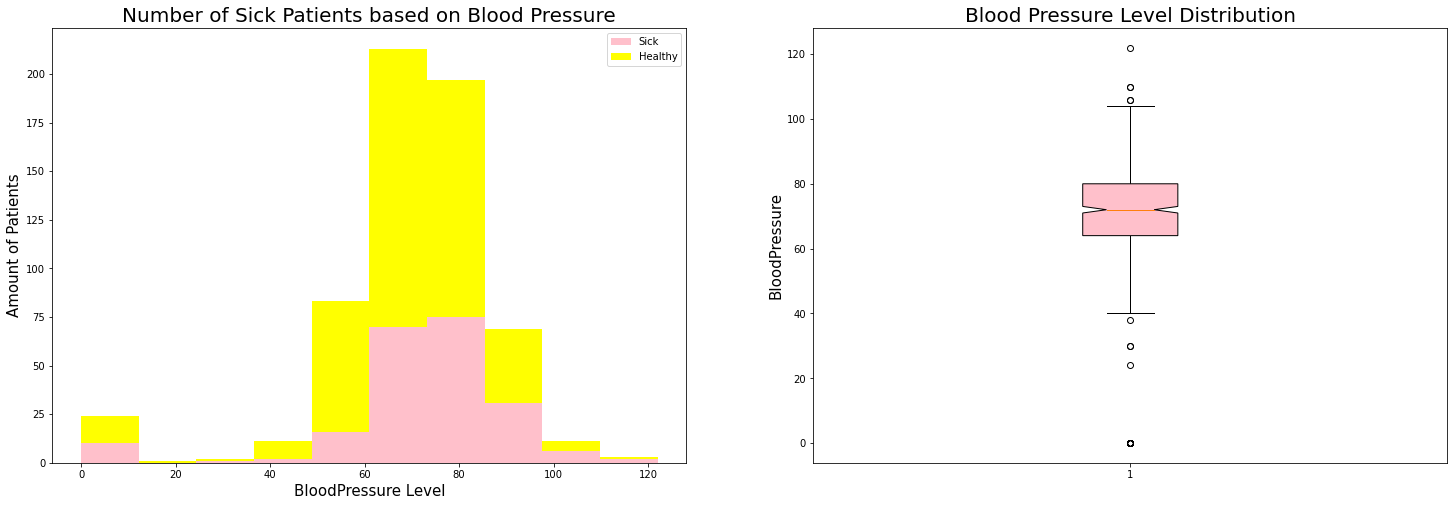

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,8))
ax1.hist([df[df['Outcome']==1]['BloodPressure'],
          df[df['Outcome']==0]['BloodPressure']], stacked=True, 
          label=['Sick','Healthy'], color = ['pink','yellow'])
ax1.set_title('Number of Sick Patients based on Blood Pressure', fontsize=20)
ax1.set_xlabel("BloodPressure Level", fontsize = 15)
ax1.set_ylabel("Amount of Patients", fontsize =15)
ax1.legend()

ax2.boxplot(df['BloodPressure'],notch=True,patch_artist=True,boxprops=dict(facecolor="pink"))
ax2.set_title('Blood Pressure Level Distribution', fontsize=20)
ax2.set_ylabel("BloodPressure", fontsize =15)

##### SKinThickness

Text(0, 0.5, 'SkinThickness')

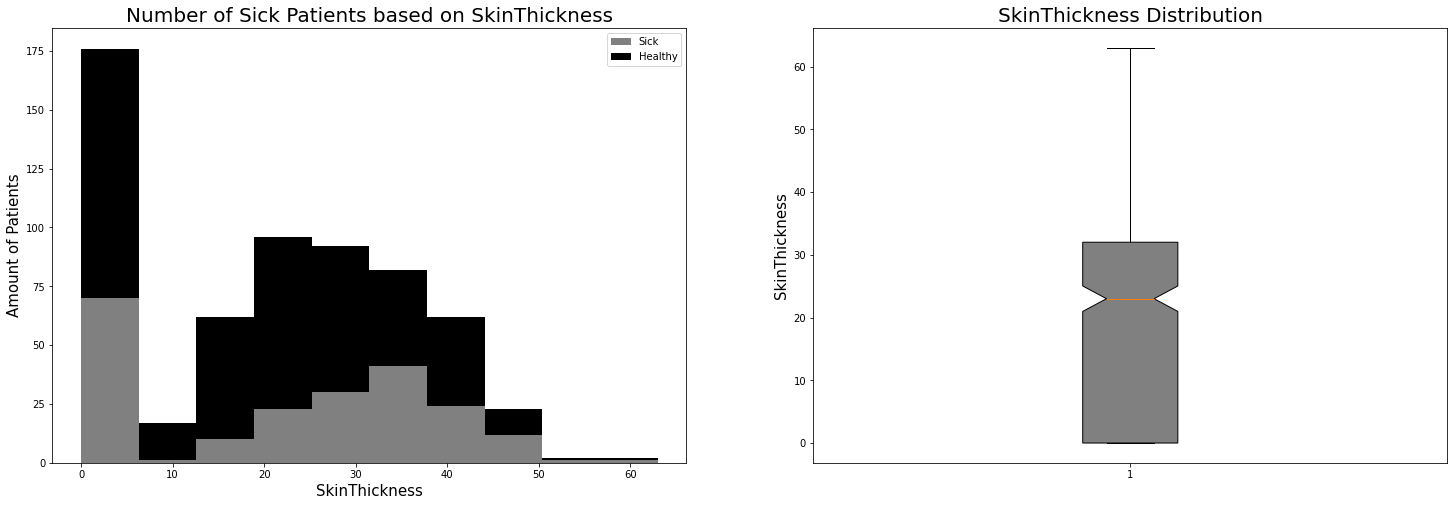

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,8))
ax1.hist([df[df['Outcome']==1]['SkinThickness'],
          df[df['Outcome']==0]['SkinThickness']], stacked=True, 
          label=['Sick','Healthy'], color = ['grey','black'])
ax1.set_title('Number of Sick Patients based on SkinThickness', fontsize=20)
ax1.set_xlabel("SkinThickness", fontsize = 15)
ax1.set_ylabel("Amount of Patients", fontsize =15)
ax1.legend()

ax2.boxplot(df['SkinThickness'],notch=True,patch_artist=True,boxprops=dict(facecolor="grey"))
ax2.set_title('SkinThickness Distribution', fontsize=20)
ax2.set_ylabel("SkinThickness", fontsize =15)



##### Insulin

Text(0, 0.5, 'Insulin')

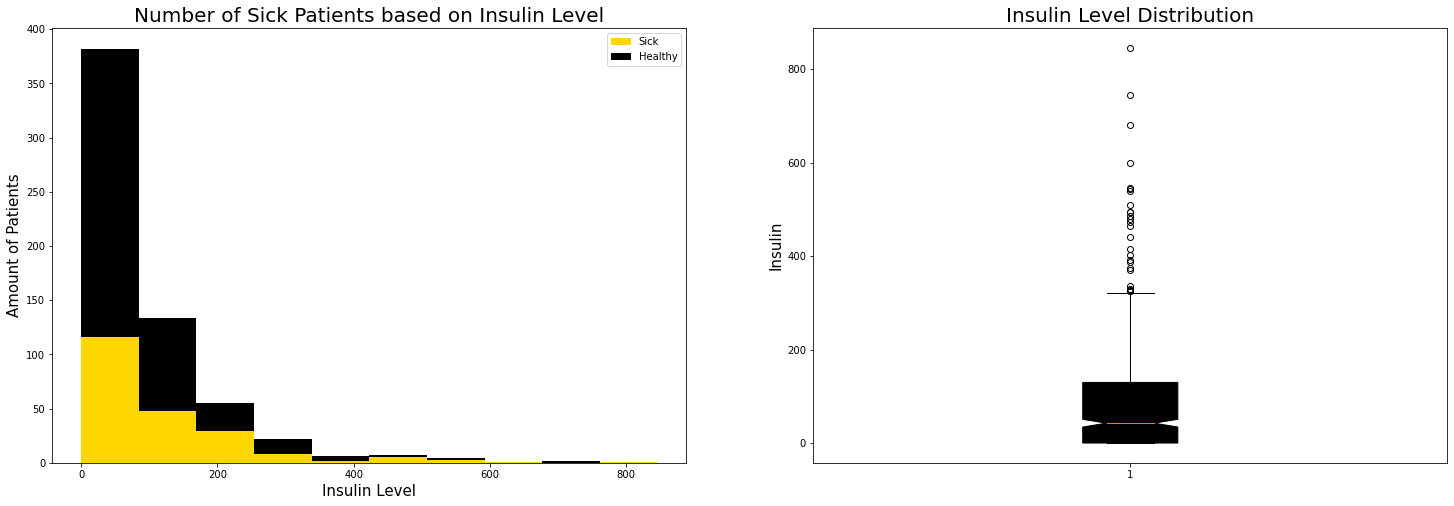

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,8))
ax1.hist([df[df['Outcome']==1]['Insulin'],
          df[df['Outcome']==0]['Insulin']], stacked=True, 
          label=['Sick','Healthy'], color = ['gold','black'])
ax1.set_title('Number of Sick Patients based on Insulin Level', fontsize=20)
ax1.set_xlabel("Insulin Level", fontsize = 15)
ax1.set_ylabel("Amount of Patients", fontsize =15)
ax1.legend()

ax2.boxplot(df['Insulin'],notch=True,patch_artist=True,boxprops=dict(facecolor="black"))
ax2.set_title('Insulin Level Distribution', fontsize=20)
ax2.set_ylabel("Insulin", fontsize =15)

##### BMI

Text(0, 0.5, 'BMI')

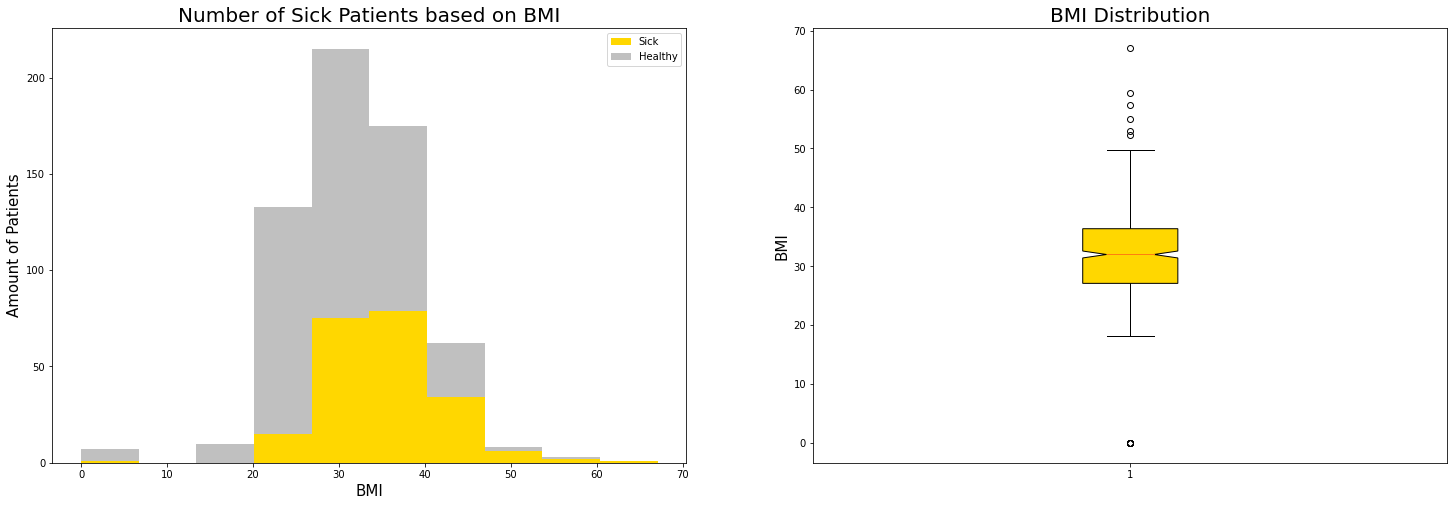

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,8))
ax1.hist([df[df['Outcome']==1]['BMI'],
          df[df['Outcome']==0]['BMI']], stacked=True, 
          label=['Sick','Healthy'], color = ['gold','silver'])
ax1.set_title('Number of Sick Patients based on BMI', fontsize=20)
ax1.set_xlabel("BMI", fontsize = 15)
ax1.set_ylabel("Amount of Patients", fontsize =15)
ax1.legend()

ax2.boxplot(df['BMI'],notch=True,patch_artist=True,boxprops=dict(facecolor="gold"))
ax2.set_title('BMI Distribution', fontsize=20)
ax2.set_ylabel("BMI", fontsize =15)

##### DiabetesPedigreeFunction

Text(0, 0.5, 'DiabetesPedigreeFunction')

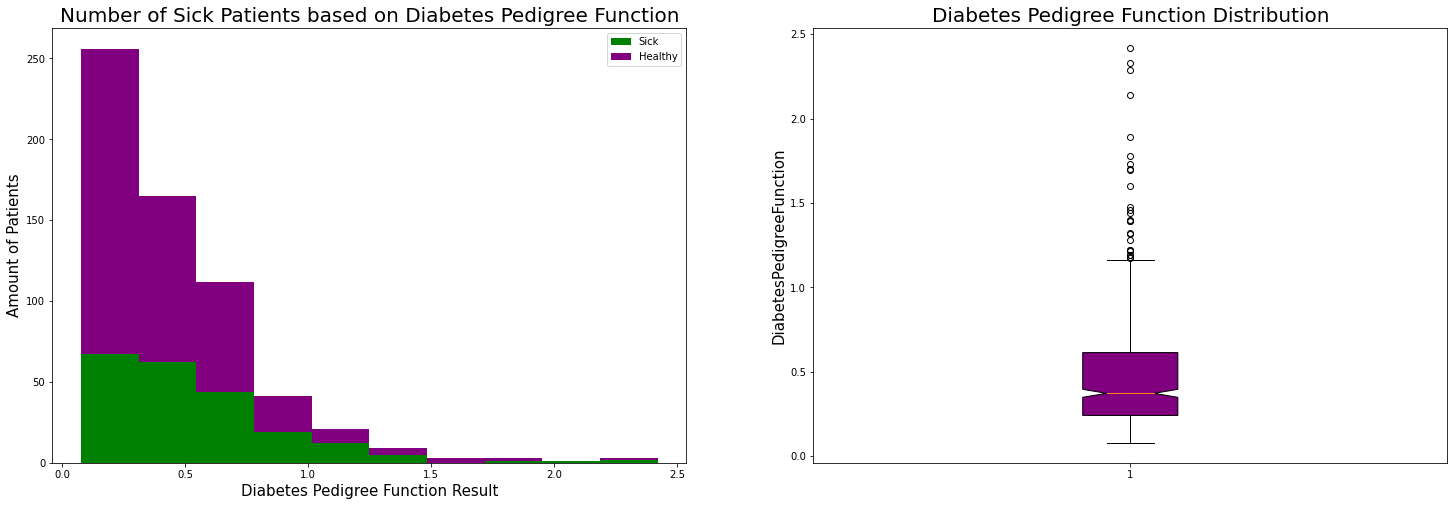

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,8))
ax1.hist([df[df['Outcome']==1]['DiabetesPedigreeFunction'],
          df[df['Outcome']==0]['DiabetesPedigreeFunction']], stacked=True, 
          label=['Sick','Healthy'], color = ['green','purple'])
ax1.set_title('Number of Sick Patients based on Diabetes Pedigree Function', fontsize=20)
ax1.set_xlabel("Diabetes Pedigree Function Result", fontsize = 15)
ax1.set_ylabel("Amount of Patients", fontsize =15)
ax1.legend()

ax2.boxplot(df['DiabetesPedigreeFunction'],notch=True,patch_artist=True,boxprops=dict(facecolor="purple"))
ax2.set_title('Diabetes Pedigree Function Distribution', fontsize=20)
ax2.set_ylabel("DiabetesPedigreeFunction", fontsize =15)

##### AGE

Text(0, 0.5, 'Age')

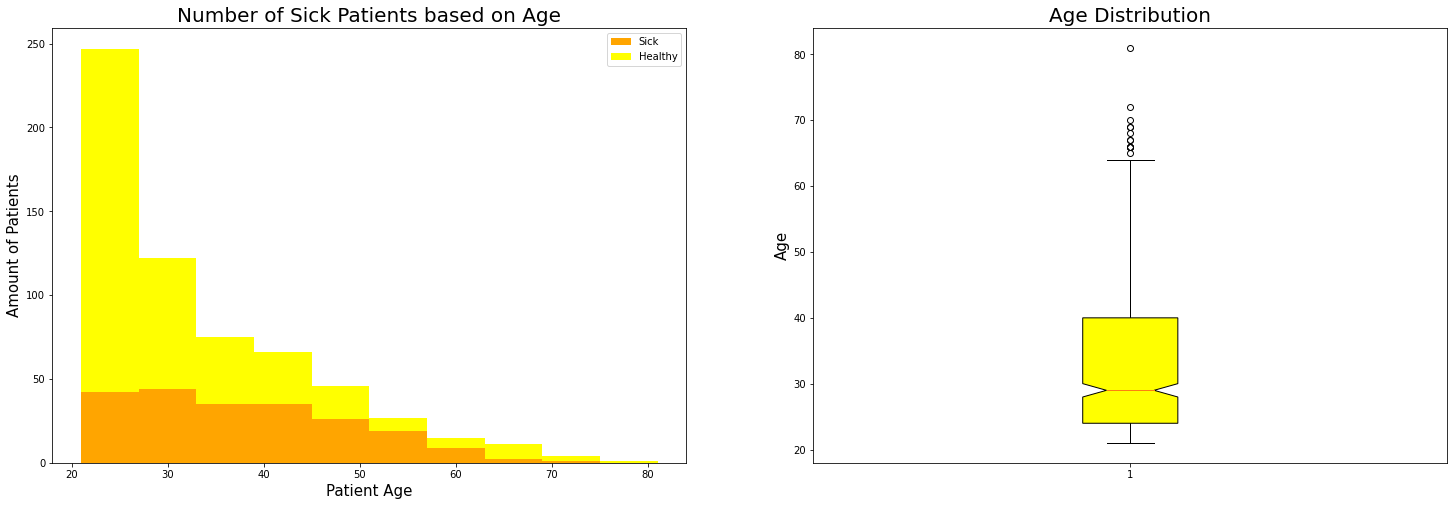

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,8))
ax1.hist([df[df['Outcome']==1]['Age'],
          df[df['Outcome']==0]['Age']], stacked=True, 
          label=['Sick','Healthy'], color = ['orange','yellow'])
ax1.set_title('Number of Sick Patients based on Age', fontsize=20)
ax1.set_xlabel("Patient Age", fontsize = 15)
ax1.set_ylabel("Amount of Patients", fontsize =15)
ax1.legend()

ax2.boxplot(df['Age'],notch=True,patch_artist=True,boxprops=dict(facecolor="yellow"))
ax2.set_title('Age Distribution', fontsize=20)
ax2.set_ylabel("Age", fontsize =15)

## 2c. Other Graphs we Thought would be Interesting

##### Average Age of Sick/Healthy 

<ipython-input-19-a76999e98939>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_facecolor("Black")


Text(0, 0.5, 'AVG Age')

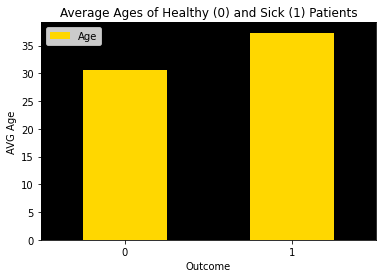

In [19]:
df[['Age','Outcome']].groupby('Outcome').mean().plot(kind='bar',rot= 0,color = 'gold',grid=False)
plt.axes().set_facecolor("Black")
plt.title("Average Ages of Healthy (0) and Sick (1) Patients")
plt.ylabel("AVG Age")

We can see above that the average age of a healthy person is around 30 years old, and that of an unhealthy person is a little<br> 
over 35.

##### BMI in Relation to Age

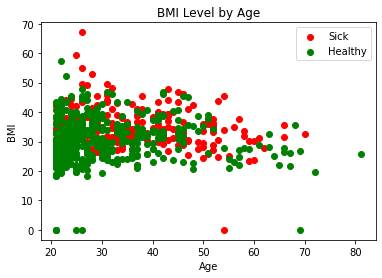

In [20]:
plt.scatter(df[df['Outcome']==1]['Age'],df[df['Outcome']==1]['BMI'],c="red", label = 'Sick')
plt.scatter(df[df['Outcome']==0]['Age'],df[df['Outcome']==0]['BMI'],c="green", label = 'Healthy')
plt.title('BMI Level by Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()

##### Insulin/Glucose 

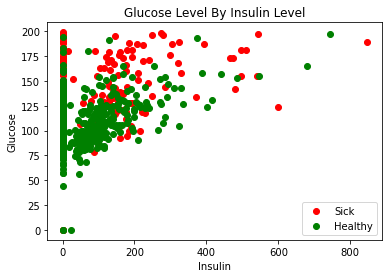

In [21]:
plt.scatter(df[df['Outcome']==1]['Insulin'],df[df['Outcome']==1]['Glucose'],c="red", label = 'Sick')
plt.scatter(df[df['Outcome']==0]['Insulin'],df[df['Outcome']==0]['Glucose'],c="green", label = 'Healthy')
plt.title('Glucose Level By Insulin Level')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.legend()
plt.show()

##### BMI in Realtion to BloodPressure

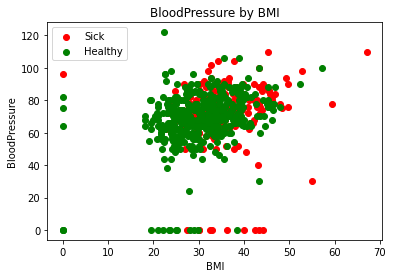

In [22]:
plt.scatter(df[df['Outcome']==1]['BMI'],df[df['Outcome']==1]['BloodPressure'],c="red", label = 'Sick')
plt.scatter(df[df['Outcome']==0]['BMI'],df[df['Outcome']==0]['BloodPressure'],c="green", label = 'Healthy')
plt.title('BloodPressure by BMI')
plt.xlabel('BMI')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()

##### Number of Pregananices by Age

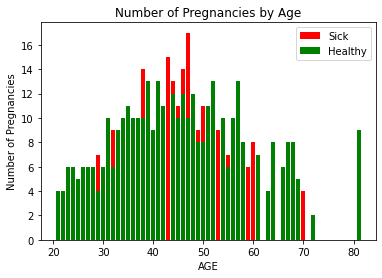

In [23]:
plt.bar(df[df['Outcome']==1]['Age'],df[df['Outcome']==1]['Pregnancies'],color="red", label = 'Sick')
plt.bar(df[df['Outcome']==0]['Age'],df[df['Outcome']==0]['Pregnancies'],color="green", label = 'Healthy')
plt.title('Number of Pregnancies by Age')
plt.xlabel('AGE')
plt.ylabel('Number of Pregnancies')
plt.legend()
plt.show()

Iteresting we would assume that the older you get the more pregnancies you could have but the data seems to explain a different <br>
story

# 3. Preproccesing:<br>
- Dealing with NA's
- Checking Outliers
- Running first models to see a baseline

## 3a. Dealing with NA's 

##### NA detection

In [24]:
nan_prop = []
for c in df.columns: 
    nan_p= (np.sum(df[c].isna())/df.shape[0])*100
    nan_prop.append((c,nan_p, np.sum(df[c].isna())))
    print("{} have NaN proportions of: {:.2f}%".format(c, nan_p))

Pregnancies have NaN proportions of: 0.00%
Glucose have NaN proportions of: 0.00%
BloodPressure have NaN proportions of: 0.00%
SkinThickness have NaN proportions of: 0.00%
Insulin have NaN proportions of: 0.00%
BMI have NaN proportions of: 0.00%
DiabetesPedigreeFunction have NaN proportions of: 0.00%
Age have NaN proportions of: 0.00%
Outcome have NaN proportions of: 0.00%


As we can see above there are no NA's in our data.
After futher analysis we saw that some of our features are medical tests and that some of them have 0's which doesnt make 
sense. We concluded that 0's in these these features are problematic values and dealt with as NA's.

##### Detection of Zero's in Medical Test Related Features

In [25]:
def check_zeros(dataframe):
    for column in dataframe:
        if column == 'Pregnancies' or column == 'Outcome':
            continue
        try:
            print(column, ":", dataframe[column].value_counts()[0])
        except KeyError:
            print(column, ":", 0)
            
check_zeros(df)

Glucose : 5
BloodPressure : 24
SkinThickness : 176
Insulin : 290
BMI : 7
DiabetesPedigreeFunction : 0
Age : 0


As we can see there are 290 NA's in Insulin and 176 in SkinThickness.
Given the high level of 0's it makes sense why they have such a low correlation in the pre-cleaned data.

### Changing SkinThickness to the Mean
Done based on the original distribution

In [26]:
# Changning the zeros to NaN to properly deal withe them.
df['SkinThickness'] = df['SkinThickness'].replace(0,np.NaN)
check_zeros(df) # making sure all 0's changed to NaN

# NaN = mean
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)

Glucose : 5
BloodPressure : 24
SkinThickness : 0
Insulin : 290
BMI : 7
DiabetesPedigreeFunction : 0
Age : 0


<ipython-input-26-2f3c8e55697b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SkinThickness'] = df['SkinThickness'].replace(0,np.NaN)
C:\Users\bendu\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


##### Distribution for SkinThickness after change

Text(0, 0.5, 'SkinThickness')

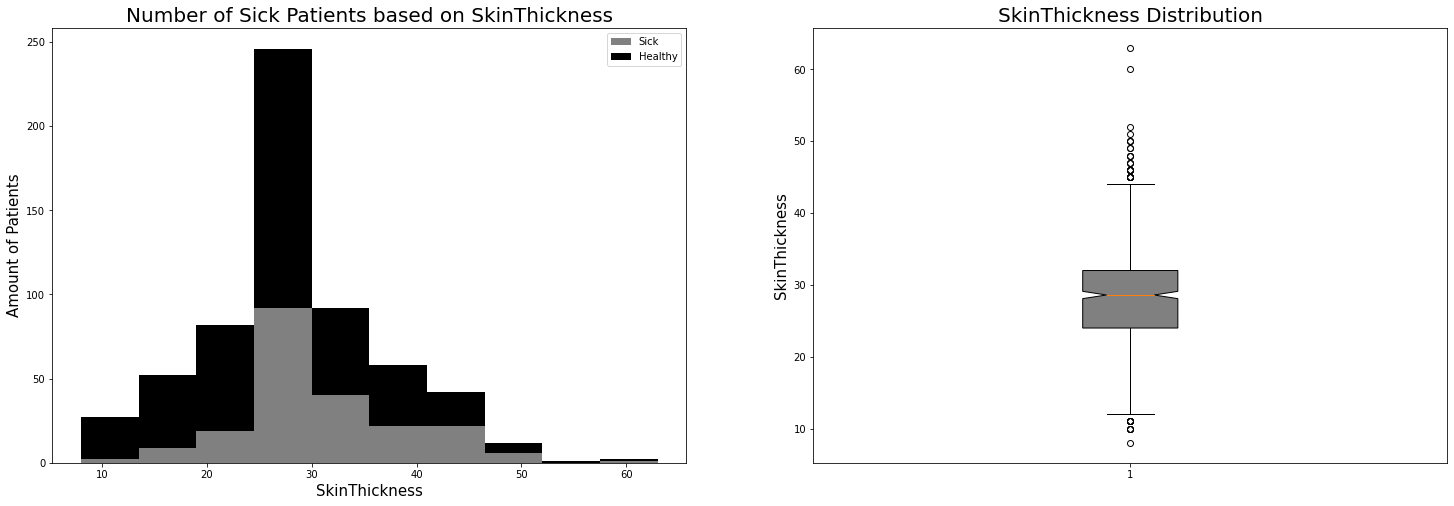

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,8))
ax1.hist([df[df['Outcome']==1]['SkinThickness'],
          df[df['Outcome']==0]['SkinThickness']], stacked=True, 
          label=['Sick','Healthy'], color = ['grey','black'])
ax1.set_title('Number of Sick Patients based on SkinThickness', fontsize=20)
ax1.set_xlabel("SkinThickness", fontsize = 15)
ax1.set_ylabel("Amount of Patients", fontsize =15)
ax1.legend()

ax2.boxplot(df['SkinThickness'],notch=True,patch_artist=True,boxprops=dict(facecolor="grey"))
ax2.set_title('SkinThickness Distribution', fontsize=20)
ax2.set_ylabel("SkinThickness", fontsize =15)

### Removing Instance's with NA's
We chose to remove the instances from: BloodPressure, Glucose, and BMI <br>
Total Instances Removed: 36

In [28]:
df = df[df['BloodPressure'] != 0] 
df = df[df['Glucose'] != 0]
df = df[df['BMI'] != 0]

### Predicting Insulin Level
Since insulin has a significant amount of NA's we decided that simply using the mean or median can create skewed data,
because of this we decided the best way to deal wiht NA's is by predicting their value using a knn regressor.
We had to deal with insulin last to properly predict the values. 

##### KNN Regression - Target Variable = Insulin

In [29]:
insul_0 = df.copy(deep=True)
insul_1 = df.copy(deep=True)
check_zeros(insul_0)
insul_0 = insul_0[insul_0['Insulin'] == 0] # Dataset that needs to be predicted.
insul_1 = insul_1[insul_1['Insulin'] != 0] # Dataset to train and test on.
out_0 = insul_0['Outcome']
out_1 = insul_1['Outcome']
#Dropping the outcome feature to avoid overfitting.
insul_0.drop('Outcome', axis=1, inplace=True)
insul_1.drop('Outcome', axis=1, inplace=True)
#Create feature and target arrays
X = insul_1.loc[:,insul_1.columns != 'Insulin']
y = insul_1['Insulin']
#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
r_sq = r2_score(y_test,y_pred)
print(r_sq)

Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 259
BMI : 0
DiabetesPedigreeFunction : 0
Age : 0
0.2959738466642151


##### Adding the predicted Insulin Level and readding the Outcome to insul_0

In [30]:
X = insul_0.loc[:,insul_1.columns != 'Insulin']
insul_0['Insulin'] = knn.predict(X)
insul_0['Outcome'] = out_0
print(insul_0)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
618            9      112             82       24.00000  155.533333  28.2   
294            0      161             50       28.59589  236.933333  21.9   
90             1       80             55       28.59589   71.466667  19.1   
235            4      171             72       28.59589  255.933333  43.6   
131            9      122             56       28.59589  155.333333  33.3   
..           ...      ...            ...            ...         ...   ...   
330            8      118             72       19.00000  147.000000  23.1   
121            6      111             64       39.00000  105.533333  34.2   
106            1       96            122       28.59589   88.400000  22.4   
270           10      101             86       37.00000  150.600000  45.6   
102            0      125             96       28.59589  153.800000  22.5   

     DiabetesPedigreeFunction  Age  Outcome  
618                     1.282

##### ReAdding Outcome to insul 1

In [31]:
insul_1['Outcome'] = out_1

##### Combining insul_0 and insul_1 to a new df

In [32]:
frames = [insul_0,insul_1]
df = pd.concat(frames)

Text(0, 0.5, 'Insulin')

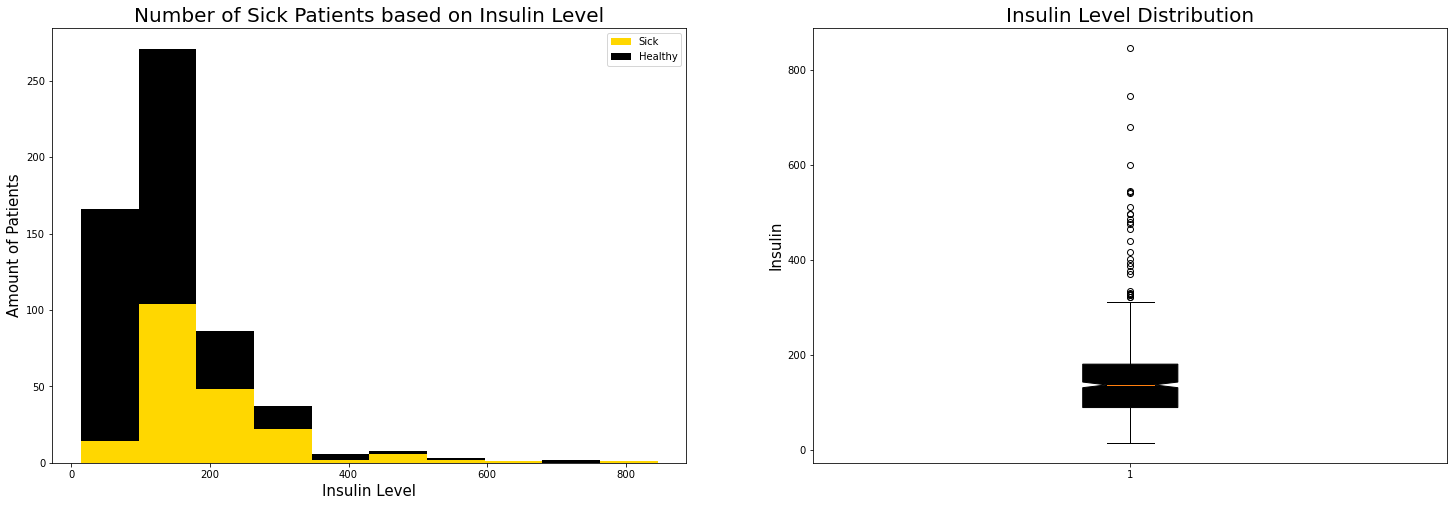

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,8))
ax1.hist([df[df['Outcome']==1]['Insulin'],
          df[df['Outcome']==0]['Insulin']], stacked=True, 
          label=['Sick','Healthy'], color = ['gold','black'])
ax1.set_title('Number of Sick Patients based on Insulin Level', fontsize=20)
ax1.set_xlabel("Insulin Level", fontsize = 15)
ax1.set_ylabel("Amount of Patients", fontsize =15)
ax1.legend()

ax2.boxplot(df['Insulin'],notch=True,patch_artist=True,boxprops=dict(facecolor="black"))
ax2.set_title('Insulin Level Distribution', fontsize=20)
ax2.set_ylabel("Insulin", fontsize =15)

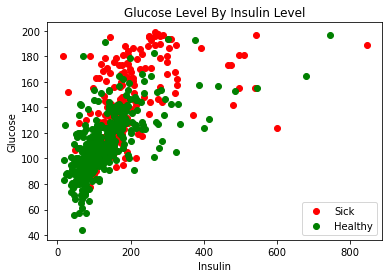

In [34]:
# new plot insulin - glucose
plt.scatter(df[df['Outcome']==1]['Insulin'],df[df['Outcome']==1]['Glucose'],c="red", label = 'Sick')
plt.scatter(df[df['Outcome']==0]['Insulin'],df[df['Outcome']==0]['Glucose'],c="green", label = 'Healthy')
plt.title('Glucose Level By Insulin Level')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.legend()
plt.show()

as seen above there is somewhat of a lineer correlation between glucose and insulin that was not shown before

##### Checking that df is the proper size

In [35]:
len(df. index)

581

### Making sure we got rid of all NA's

In [36]:
### NA's that were zeros
check_zeros(df)

Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
DiabetesPedigreeFunction : 0
Age : 0


In [37]:
# zero's changed to Nan
nan_prop = []
for c in df.columns: 
    nan_p= (np.sum(df[c].isna())/df.shape[0])*100
    nan_prop.append((c,nan_p, np.sum(df[c].isna())))
    print("{} have NaN proportions of: {:.2f}%".format(c, nan_p))

Pregnancies have NaN proportions of: 0.00%
Glucose have NaN proportions of: 0.00%
BloodPressure have NaN proportions of: 0.00%
SkinThickness have NaN proportions of: 0.00%
Insulin have NaN proportions of: 0.00%
BMI have NaN proportions of: 0.00%
DiabetesPedigreeFunction have NaN proportions of: 0.00%
Age have NaN proportions of: 0.00%
Outcome have NaN proportions of: 0.00%


##### Checking new Correlation to the Target Variable

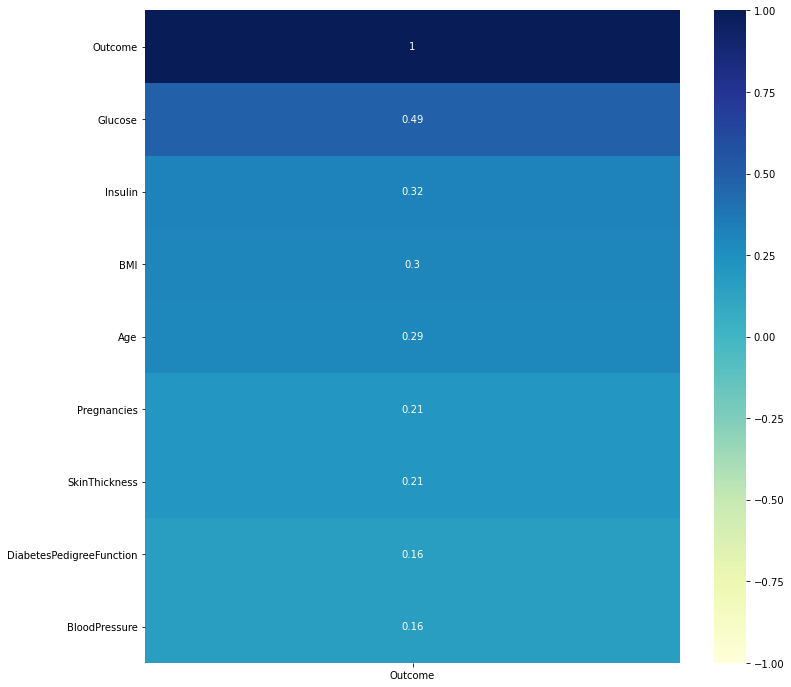

In [38]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr()[["Outcome"]].sort_values("Outcome").tail(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

### Post NA Correlation (HeatMap)

<AxesSubplot:>

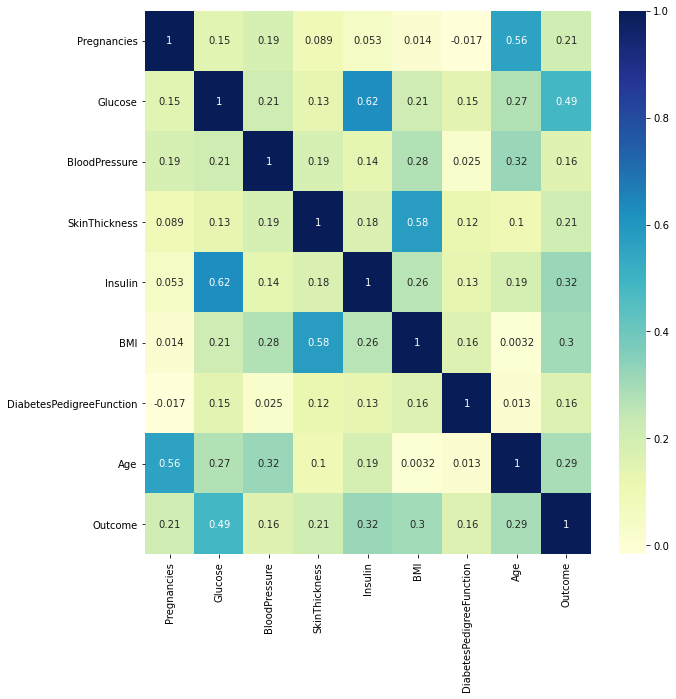

In [39]:
# Pearson Correlation
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu",annot=True)

### Summary:
After dealing with NA's our dataset stands at:
8 Features (not including our target variable)
581 Instances
We can see in the graphs above that the correlations grew stronger after dealing with NA's

## 3b. Outliers

<ipython-input-40-8524f611852d>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_facecolor("darkGray")


Text(0.5, 0, 'Feature')

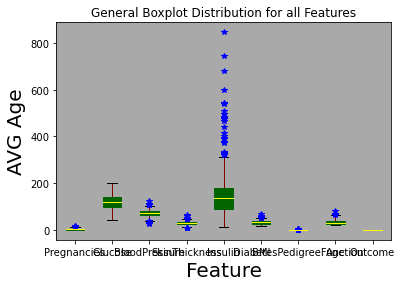

In [40]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "Maroon",
    "medians": "yellow",
    "caps": "Black",
}


df.plot.box(grid=False,patch_artist=True,color=color, sym="b*");
plt.axes().set_facecolor("darkGray")
plt.title("General Boxplot Distribution for all Features")
plt.ylabel("AVG Age", fontsize = 20)
plt.xlabel("Feature", fontsize = 20)

In [41]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,3.784854,122.104991,72.230637,28.613727,152.397590,32.407917,0.470547,32.982788,0.344234
std,3.322885,30.485061,12.339668,8.600835,97.074669,6.959303,0.337763,11.430436,0.475527
min,0.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,24.000000,88.666667,27.300000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,28.595890,136.400000,32.000000,0.378000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,33.000000,180.000000,36.500000,0.614000,40.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Outlier Removal Base on IQR

In [42]:
for x in df.columns:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25 # Intr quantile range
 
    max = q75+(1.5*intr_qr) # max value
    min = q25-(1.5*intr_qr) # min value
    
    # Changing outliers to Nan
    df.loc[df[x] < min,x] = np.nan 
    df.loc[df[x] > max,x] = np.nan

print("Number of Outliers Per Feature")
print(df.isnull().sum()) # Checking how many null value there are 
df = df.dropna(axis = 0) # Dropping null values (outliers)
print("--------------------------------")
print("Number of Outliers left")
print(df.isnull().sum()) # Making sure all null values were removed

Number of Outliers Per Feature
Pregnancies                  4
Glucose                      0
BloodPressure                9
SkinThickness               20
Insulin                     29
BMI                          6
DiabetesPedigreeFunction    25
Age                         11
Outcome                      0
dtype: int64
--------------------------------
Number of Outliers left
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<ipython-input-43-8524f611852d>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_facecolor("darkGray")


Text(0.5, 0, 'Feature')

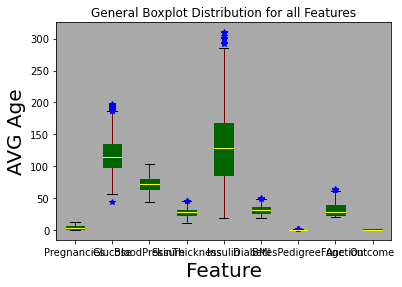

In [43]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "Maroon",
    "medians": "yellow",
    "caps": "Black",
}


df.plot.box(grid=False,patch_artist=True,color=color, sym="b*");
plt.axes().set_facecolor("darkGray")
plt.title("General Boxplot Distribution for all Features")
plt.ylabel("AVG Age", fontsize = 20)
plt.xlabel("Feature", fontsize = 20)

In [44]:
df.shape[0]

485

##### Summary:
After removing outliers we are left with 485 instances

## 3c. Nomilization and Model Comparisons
below you can find a chunk running various models to check there performance, the normilization is done after the split into
train and test data sets.
for our first try we chose to use Min/Max scaling.

In [105]:
h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Naive Bayes"
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB()
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [df,df]



# preprocess dataset, split into training and test part
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=r_seed
)

# Normalizing Train and Test Data
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = {}
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    score = clf.score(X_test_scaled, y_test)
    rec_score = recall_score(y_test, y_pred)
    results[name] = score

    
#print(name, prec_score)
    
sorted_dict_NM1 = {}
sorted_keys = sorted(results, key=results.get)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict_NM1[w] = results[w]

print ("{:<8} {:<15}".format('Model','Accuracy'))
for v in sorted_dict_NM1.items():
    Model,Accuracy = v
    print ("{:<10}  {:<20}".format(Model, Accuracy))

Model    Accuracy       
Decision Tree  0.6597938144329897  
Nearest Neighbors  0.7216494845360825  
RBF SVM     0.7422680412371134  
Gaussian Process  0.7525773195876289  
Random Forest  0.7628865979381443  
Naive Bayes  0.7731958762886598  


##### From here we plan on moving foward only with the random forest model!
Even though Naive bayes initially has a better accuracy (not by much) we chose to move foward with the random forest because it has more options to optimize and we think that due to the fact that we don't need to normalize the data we can produce better results.

# 4. Data Manipulation:
### Feature Manipulation, Feature Engeneering, and Feature Selection
In this step we will explore different changes in our data to try and optimize the models.The way we plan to do this is by adding all our feature variations and engineered features to our dataset and then running sklearns feature selection function. 

##### Data set with Polynomial Features

In [46]:
df1 = df.copy(deep=True)

In [47]:
# Adding feature^2
df1.insert(8, 'Preg^2',df1['Pregnancies']**2 )
df1.insert(9, 'Glucose^2',df1['Glucose']**2 )
df1.insert(10, 'BP^2',df1['BloodPressure']**2 )
df1.insert(11, 'ST^2',df1['SkinThickness']**2 )
df1.insert(12, 'Insulin^2',df['Insulin']**2 )
df1.insert(13, 'BMI^2',df1['BMI']**2 )
df1.insert(14, 'DPF^2',df1['DiabetesPedigreeFunction']**2 )
df1.insert(15, 'Age^2',df1['Age']**2 )

# Adding feature^3
df1.insert(16, 'Preg^3',df1['Pregnancies']**3 )
df1.insert(17, 'Glucose^3',df1['Glucose']**3 )
df1.insert(18, 'BP^3',df1['BloodPressure']**3 )
df1.insert(19, 'ST^3',df1['SkinThickness']**3 )
df1.insert(20, 'Insulin^3',df1['Insulin']**3 )
df1.insert(21, 'BMI^3',df1['BMI']**3 )
df1.insert(22, 'DPF^3',df1['DiabetesPedigreeFunction']**3 )
df1.insert(23, 'Age^3',df1['Age']**3 )

##### Adding  feature called Insulin/Glucose ratio

In [48]:
df1.insert(8, 'IG_ratio', df1['Insulin']/df1['Glucose'])

Making sure no Na's were added while adding features

In [49]:
nan_prop = []
for c in df1.columns: 
    nan_p= (np.sum(df1[c].isna())/df1.shape[0])*100
    nan_prop.append((c,nan_p, np.sum(df1[c].isna())))
    print("{} have NaN proportions of: {:.2f}%".format(c, nan_p))

Pregnancies have NaN proportions of: 0.00%
Glucose have NaN proportions of: 0.00%
BloodPressure have NaN proportions of: 0.00%
SkinThickness have NaN proportions of: 0.00%
Insulin have NaN proportions of: 0.00%
BMI have NaN proportions of: 0.00%
DiabetesPedigreeFunction have NaN proportions of: 0.00%
Age have NaN proportions of: 0.00%
IG_ratio have NaN proportions of: 0.00%
Preg^2 have NaN proportions of: 0.00%
Glucose^2 have NaN proportions of: 0.00%
BP^2 have NaN proportions of: 0.00%
ST^2 have NaN proportions of: 0.00%
Insulin^2 have NaN proportions of: 0.00%
BMI^2 have NaN proportions of: 0.00%
DPF^2 have NaN proportions of: 0.00%
Age^2 have NaN proportions of: 0.00%
Preg^3 have NaN proportions of: 0.00%
Glucose^3 have NaN proportions of: 0.00%
BP^3 have NaN proportions of: 0.00%
ST^3 have NaN proportions of: 0.00%
Insulin^3 have NaN proportions of: 0.00%
BMI^3 have NaN proportions of: 0.00%
DPF^3 have NaN proportions of: 0.00%
Age^3 have NaN proportions of: 0.00%
Outcome have NaN 

In [50]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,IG_ratio,Preg^2,...,Age^2,Preg^3,Glucose^3,BP^3,ST^3,Insulin^3,BMI^3,DPF^3,Age^3,Outcome
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,...,485.000000,485.000000,4.850000e+02,4.850000e+02,485.000000,4.850000e+02,485.000000,485.000000,485.000000,485.000000
mean,3.719588,119.020619,71.882474,27.898658,133.631065,31.784536,0.414571,32.113402,1.103176,23.843299,...,1138.476289,189.002062,1.994479e+06,3.970359e+05,26567.426358,3.934872e+06,36033.682064,0.151882,44520.059794,0.315464
std,3.166804,28.675723,10.876305,7.640097,59.490942,6.355874,0.235459,10.364709,0.365147,33.595186,...,778.011970,366.136522,1.543241e+06,1.788909e+05,20039.788797,5.276588e+06,21762.111684,0.253494,47470.459533,0.465180
min,0.000000,44.000000,44.000000,11.000000,18.000000,18.200000,0.078000,21.000000,0.174603,0.000000,...,441.000000,0.000000,8.518400e+04,8.518400e+04,1331.000000,5.832000e+03,6028.568000,0.000475,9261.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,86.666667,27.000000,0.238000,24.000000,0.882353,1.000000,...,576.000000,1.000000,9.702990e+05,2.621440e+05,12167.000000,6.509630e+05,19683.000000,0.013481,13824.000000,0.000000
50%,3.000000,115.000000,72.000000,28.595890,129.000000,31.900000,0.349000,28.000000,1.084524,9.000000,...,784.000000,27.000000,1.520875e+06,3.732480e+05,23383.573011,2.146689e+06,32461.759000,0.042509,21952.000000,0.000000
75%,6.000000,134.000000,80.000000,32.000000,168.266667,35.500000,0.565000,39.000000,1.321649,36.000000,...,1521.000000,216.000000,2.406104e+06,5.120000e+05,32768.000000,4.764247e+06,44738.875000,0.180362,59319.000000,1.000000
max,13.000000,198.000000,104.000000,46.000000,310.000000,49.300000,1.154000,64.000000,2.623762,169.000000,...,4096.000000,2197.000000,7.762392e+06,1.124864e+06,97336.000000,2.979100e+07,119823.157000,1.536800,262144.000000,1.000000


##### Removing Outliers from new data

In [51]:
for x in df1.columns:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25 # Intr quantile range
 
    max = q75+(1.5*intr_qr) # max value
    min = q25-(1.5*intr_qr) # min value
    
    # Changing outliers to Nan
    df1.loc[df1[x] < min,x] = np.nan 
    df1.loc[df1[x] > max,x] = np.nan

print("Number of Outliers Per Feature")
print(df1.isnull().sum()) # Checking how many null value there are 
df1 = df1.dropna(axis = 0) # Dropping null values (outliers)
print("--------------------------------")
print("Number of Outliers left")
print(df1.isnull().sum()) # Making sure all null values were removed

Number of Outliers Per Feature
Pregnancies                  0
Glucose                     16
BloodPressure                0
SkinThickness                4
Insulin                      8
BMI                          2
DiabetesPedigreeFunction     9
Age                          4
IG_ratio                    12
Preg^2                      32
Glucose^2                   30
BP^2                         5
ST^2                        14
Insulin^2                   29
BMI^2                       13
DPF^2                       27
Age^2                       20
Preg^3                      48
Glucose^3                   42
BP^3                         6
ST^3                        41
Insulin^3                   37
BMI^3                       27
DPF^3                       43
Age^3                       36
Outcome                      0
dtype: int64
--------------------------------
Number of Outliers left
Pregnancies                 0
Glucose                     0
BloodPressure               0
Ski

In [52]:
df1.shape[0]

290

##### Summary:
After removing outliers from df1 we are left with 290 instances

# 5. Final Data Preperation for Modelling

#### Reminder:
df - original datset (8 features - 485 instances) <br>
df1 - data set with feature engineering (25 features - 290 instances) <br>
we are keeping the data sets apart to see the difference the feature engineering makes.

##### Splitting and Normalizing Data

In [53]:
# Split into training and test part
# Split for original df
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
#split for feature engeneered df
X1 = df1.iloc[:,:-1]
y1 = df1.iloc[:,-1]

# Train and test for each
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r_seed)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=r_seed)

# Normalizing Train and Test Data
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) #Original Data normalized
X_test_scaled = scaler.transform(X_test)
X1_train_scaled = scaler.fit_transform(X1_train) # Added feature Data normalized
X1_test_scaled = scaler.transform(X1_test)

##### Running Feature selection to optimize data only on df1
we decided this becasue our original dataset has a small number of features.

In [54]:
from sklearn.feature_selection import RFECV
estimator = RandomForestClassifier()
selector = RFECV(estimator,step=1, cv=3)
selector = selector.fit(X1_train_scaled,y1_train)

In [55]:
X1.columns[selector.get_support()]

Index(['Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'IG_ratio', 'Glucose^2', 'BP^2',
       'Insulin^2', 'BMI^2', 'DPF^2', 'Age^2', 'Glucose^3', 'BP^3', 'ST^3',
       'Insulin^3', 'BMI^3', 'DPF^3', 'Age^3'],
      dtype='object')

In [56]:
len(selector.transform(X1_train_scaled)[0])

20

In [57]:
X1_train_scaled_best = selector.transform(X1_train_scaled)
X1_test_scaled_best = selector.transform(X1_test_scaled)
X1_train_best = selector.transform(X1_train)
X1_test_best = selector.transform(X1_test)

We tried both RFECV and sequental feature selections, RFECV outperformed and therefor we continued with it.<br>
The RFECV selector selcted 20/25 features in df1.

# 6. Modelling - Data Optimization

We are running our model with different observations including normalized/non normilized data and the full data set <br>
and the feature selected data set. We will run each data group on a basic model and then choose the best combination, after this step we will run hyper parameter tuning.

### 6a. Original Data Sets - Not Normilized

In [58]:
# df - original data set
rfr_df = RandomForestClassifier(random_state = r_seed)
rfr_df.fit(X_train, y_train)
rf_df_predictions = rfr_df.predict(X_test)
rf_df_errors = abs(rf_df_predictions - y_test)
print('Random Forest df Accuracy:', round(np.mean(100 - rf_df_errors*100), 2), '%')

print("---------------------------------------------------------------------------------------------")

#df1 - feature engeneered data
rfr_df1 = RandomForestClassifier(random_state = r_seed)
rfr_df1.fit(X1_train, y1_train)
rf_df1_predictions = rfr_df1.predict(X1_test)
rf_df1_errors = abs(rf_df1_predictions - y1_test)
print('Random Forest df1 Accuracy:', round(np.mean(100 - rf_df1_errors*100), 2), '%')

Random Forest df Accuracy: 76.29 %
---------------------------------------------------------------------------------------------
Random Forest df1 Accuracy: 81.03 %


### 6b. Original Data Sets - Normilized

In [59]:
# df - original data set
rfr_df_n = RandomForestClassifier(random_state = r_seed)
rfr_df_n.fit(X_train_scaled, y_train)
rf_df_predictions_n = rfr_df_n.predict(X_test_scaled)
rf_df_errors_n = abs(rf_df_predictions_n - y_test)
print('Random Forest df Accuracy:', round(np.mean(100 - rf_df_errors_n*100), 2), '%')
print("---------------------------------------------------------------------------------------------")

#df1 - feature engeneered data
rfr_df1_n = RandomForestClassifier(random_state = r_seed)
rfr_df1_n.fit(X1_train_scaled, y1_train)
rf_df1_predictions_n = rfr_df1_n.predict(X1_test_scaled)
rf_df1_errors_n = abs(rf_df1_predictions_n - y1_test)
print('Random Forest df1 Accuracy:', round(np.mean(100 - rf_df1_errors_n*100), 2), '%')

Random Forest df Accuracy: 76.29 %
---------------------------------------------------------------------------------------------
Random Forest df1 Accuracy: 81.03 %


### 6c. Feature Selected Data Set - Not Normilized
we're running this only on df1 because we chose not to do feature selection on df due to small number of features

In [60]:
rfr_df1_fs = RandomForestClassifier(random_state = r_seed)
rfr_df1_fs.fit(X1_train_best, y1_train)
rf_df1_predictions_fs = rfr_df1_fs.predict(X1_test_best)
rf_df1_errors_fs = abs(rf_df1_predictions_fs - y1_test)
print('Random Forest df1 feature selected Accuracy:', round(np.mean(100 - rf_df1_errors_fs*100), 2), '%')

Random Forest df1 feature selected Accuracy: 84.48 %


### 6d.Feature Selected Data Set - Normalized 

In [61]:
rfr_df1_fs_n = RandomForestClassifier(random_state = r_seed)
rfr_df1_fs_n.fit(X1_train_scaled_best, y1_train)
rf_df1_predictions_fs_n = rfr_df1_fs_n.predict(X1_test_scaled_best)
rf_df1_errors_fs_n = abs(rf_df1_predictions_fs_n - y1_test)
print('Random Forest df1 feature selected Accuracy:', round(np.mean(100 - rf_df1_errors_fs_n*100), 2), '%')

Random Forest df1 feature selected Accuracy: 84.48 %


# 7. Modelling - Hyper Parameter Tuning
After Looking at the baseline models running on each of our data set types we are choosing to move forward with our feature engineered non normilized data with feature selection.
Selected Data Set - df1<br>
Non-Normalized Data - X1_train_best , X1_test_best<br>
Current Accuracy - 84.48% <br>
We chose this over the normalized data because they gave similar results and since we are dealing with a random forrest classifier we think its best to use the original formatted data.

In [62]:
### creating data for final learning curve (9.)
df_final_train = df1.copy(deep=True)

### 7a. Random Search Tuning

In [83]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 30, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}




# First create the base model to tune
rf_clf = RandomForestClassifier(random_state = r_seed)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfR_clf = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid
                             , n_iter = 100, cv = 3, verbose=2, random_state=r_seed, n_jobs = -1)
# Fit the random search model
rfR_clf.fit(X1_train_best, y1_train)
# Use the forest's predict method on the test data
rfR_predictions = rfR_clf.predict(X1_test_best)
# Calculate the absolute errors
rfR_errors = abs(rfR_predictions - y1_test)
# Print out the mean absolute error (mae)
print('Random Forest Accuracy:', round(np.mean(100 - rfR_errors*100), 2), '%')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Random Forest Accuracy: 84.48 %


In [84]:
rfR_clf.best_params_

{'n_estimators': 20,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [85]:
rfR_clf_best = rfR_clf.best_estimator_

### 7b. Grid Search Tuning

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
param_grid = {
    "n_estimators": [90,100, 120, 150, 170,190],
    "max_features": ['sqrt',6, 8,10],
    "max_depth": [3,4,6,7,8,9,10,11,15],
    'min_samples_leaf': [1,3,5,7,11],
    'min_samples_split': [2,10,12,15]
    }

# Create a based model
rfr_gs = RandomForestClassifier(random_state = r_seed)
# Instantiate the grid search model
rfGS_clf = GridSearchCV(estimator = rfr_gs, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [67]:
# Fit the grid search to the data
rfGS_clf.fit(X1_train_best, y1_train)
rfGS_clf_best = rfGS_clf.best_estimator_

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


In [68]:
rfGS_clf.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 90}

In [69]:
# Function properly printing the results of the model.
def evaluate(model, test_features, test_labels):
    # Use the forest's predict method on the test data
    predictions = model.predict(test_features)
    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
    # Print out the mean absolute error (mae)
    print('Accuracy:', round(np.mean(100 - errors*100), 2), '%')

    f1_scor = f1_score(test_labels, predictions)
    print('F1: {:.2f}%'.format(f1_scor*100))
    
    return

In [70]:
print("Random Forest - Grid Search")
pred = rfGS_clf_best.predict(X1_test_best)
print(accuracy_score(y1_test,pred)*100)

Random Forest - Grid Search
82.75862068965517


# Final Model Choice

We chose the randomSearch claiffier results - rfR_clf_best

##### Visualizing example of tree from forest 

[Text(374.79588607594934, 516.4200000000001, 'Glucose <= 111.5\ngini = 0.3\nsamples = 183\nvalue = [236, 53]'),
 Text(198.65506329113924, 462.06000000000006, 'DPF^3 <= 0.306\ngini = 0.144\nsamples = 103\nvalue = [154, 13]'),
 Text(132.4367088607595, 407.70000000000005, 'Age <= 28.5\ngini = 0.085\nsamples = 98\nvalue = [151, 7]'),
 Text(63.56962025316456, 353.34000000000003, 'Glucose^2 <= 6162.5\ngini = 0.018\nsamples = 73\nvalue = [110, 1]'),
 Text(42.379746835443036, 298.98, 'Insulin <= 87.0\ngini = 0.165\nsamples = 7\nvalue = [10, 1]'),
 Text(21.189873417721518, 244.62, 'gini = 0.0\nsamples = 6\nvalue = [10, 0]'),
 Text(63.56962025316456, 244.62, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(84.75949367088607, 298.98, 'gini = 0.0\nsamples = 66\nvalue = [100, 0]'),
 Text(201.30379746835442, 353.34000000000003, 'Age^2 <= 1128.5\ngini = 0.223\nsamples = 25\nvalue = [41, 6]'),
 Text(148.32911392405063, 298.98, 'Age <= 30.5\ngini = 0.473\nsamples = 9\nvalue = [8, 5]'),
 Text(105.94936

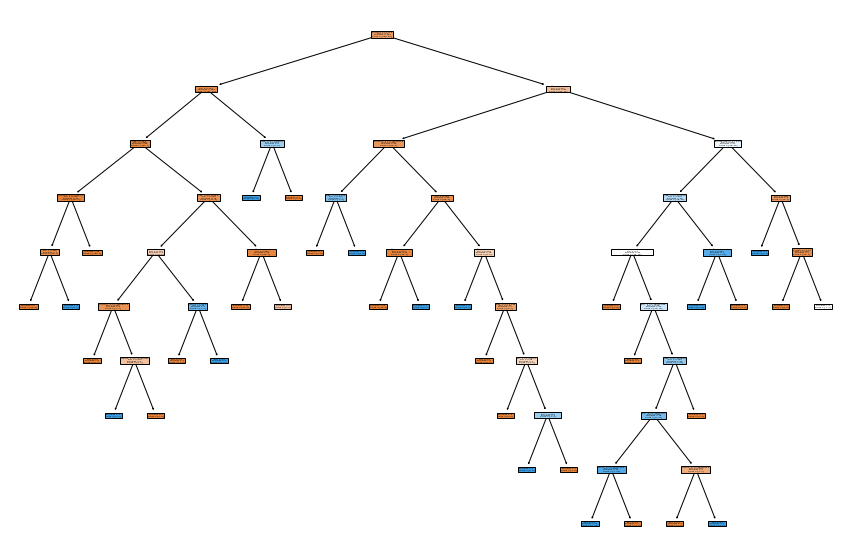

In [98]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(rfR_clf_best.estimators_[19],feature_names =X1.columns[selector.get_support()] ,filled=True)

##### Feature Importance

In [104]:
for n, v in zip(X1.columns[selector.get_support()], rfR_clf_best.feature_importances_):
    print("{} = {}".format(n, v))

Glucose = 0.05085712226665367
BloodPressure = 0.02634841432813725
Insulin = 0.06994292103779996
BMI = 0.04149771284333536
DiabetesPedigreeFunction = 0.04052163817874107
Age = 0.06072011653103528
IG_ratio = 0.09480854017050201
Glucose^2 = 0.05253554057487568
BP^2 = 0.028216573826897698
Insulin^2 = 0.06223537813926568
BMI^2 = 0.03177182547942732
DPF^2 = 0.045554285295620604
Age^2 = 0.04290177042254945
Glucose^3 = 0.06380116866613618
BP^3 = 0.028878468558071944
ST^3 = 0.029996364056985702
Insulin^3 = 0.08429679828537001
BMI^3 = 0.026612308707239716
DPF^3 = 0.04197972349201847
Age^3 = 0.07652332913933704


# 8. New Data Pipeline
We are using the final test data created and put aside in the begining of the project.<br>
we do not have a place for new data.

##### Dealing with NA's

In [71]:
####################################### Skin Thickness #######################################

# Changning the zeros to NaN to properly deal withe them.
df_final_test['SkinThickness'] = df_final_test['SkinThickness'].replace(0,np.NaN)

# NaN = mean
df_final_test['SkinThickness'].fillna(df_final_test['SkinThickness'].mean(), inplace=True)

##############################################################################################
####################################### Instance Removal #####################################
df_final_test = df_final_test[df_final_test['BloodPressure'] != 0] 
df_final_test = df_final_test[df_final_test['Glucose'] != 0]
df_final_test = df_final_test[df_final_test['BMI'] != 0]
##############################################################################################

<ipython-input-71-942558a2b34b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_test['SkinThickness'] = df_final_test['SkinThickness'].replace(0,np.NaN)
C:\Users\bendu\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


##### KNN - Dealing with NA's for Insulin

In [72]:
out = df_final_test['Outcome']
df_final_test.drop('Outcome',axis=1,inplace=True)
#splitting the data into missing insulin and not
in_1 = df_final_test[df_final_test['Insulin'] != 0]
in_0 = df_final_test[df_final_test['Insulin'] == 0]
# Filling Insulin for empty values
X = in_0.loc[:,in_1.columns != 'Insulin']
in_0['Insulin'] = knn.predict(X)
#
frames = [in_0,in_1]
df_final_test = pd.concat(frames)
df_final_test['Outcome'] = out 

<ipython-input-72-0fe08bacd70c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_0['Insulin'] = knn.predict(X)


##### Adding Polynomial Features

In [73]:
# Adding feature^2
df_final_test.insert(8, 'Preg^2',df_final_test['Pregnancies']**2 )
df_final_test.insert(9, 'Glucose^2',df_final_test['Glucose']**2 )
df_final_test.insert(10, 'BP^2',df_final_test['BloodPressure']**2 )
df_final_test.insert(11, 'ST^2',df_final_test['SkinThickness']**2 )
df_final_test.insert(12, 'Insulin^2',df_final_test['Insulin']**2 )
df_final_test.insert(13, 'BMI^2',df_final_test['BMI']**2 )
df_final_test.insert(14, 'DPF^2',df_final_test['DiabetesPedigreeFunction']**2 )
df_final_test.insert(15, 'Age^2',df_final_test['Age']**2 )

# Adding feature^3
df_final_test.insert(16, 'Preg^3',df_final_test['Pregnancies']**3 )
df_final_test.insert(17, 'Glucose^3',df_final_test['Glucose']**3 )
df_final_test.insert(18, 'BP^3',df_final_test['BloodPressure']**3 )
df_final_test.insert(19, 'ST^3',df_final_test['SkinThickness']**3 )
df_final_test.insert(20, 'Insulin^3',df_final_test['Insulin']**3 )
df_final_test.insert(21, 'BMI^3',df_final_test['BMI']**3 )
df_final_test.insert(22, 'DPF^3',df_final_test['DiabetesPedigreeFunction']**3 )
df_final_test.insert(23, 'Age^3',df_final_test['Age']**3 )

##### Adding Insulin/Glucose Ratio

In [74]:
df_final_test.insert(8, 'IG_ratio', df_final_test['Insulin']/df_final_test['Glucose'])

##### Removing Outliers

In [75]:
for x in df_final_test.columns:
    q75,q25 = np.percentile(df_final_test.loc[:,x],[75,25])
    intr_qr = q75-q25 # Intr quantile range
 
    max = q75+(1.5*intr_qr) # max value
    min = q25-(1.5*intr_qr) # min value
    
    # Changing outliers to Nan
    df_final_test.loc[df_final_test[x] < min,x] = np.nan 
    df_final_test.loc[df_final_test[x] > max,x] = np.nan

print("Number of Outliers Per Feature")
print(df_final_test.isnull().sum()) # Checking how many null value there are 
df_final_test = df_final_test.dropna(axis = 0) # Dropping null values (outliers)
print("--------------------------------")
print("Number of Outliers left")
print(df_final_test.isnull().sum()) # Making sure all null values were removed

Number of Outliers Per Feature
Pregnancies                  0
Glucose                      0
BloodPressure                5
SkinThickness               25
Insulin                      4
BMI                          1
DiabetesPedigreeFunction     2
Age                          0
IG_ratio                     9
Preg^2                      10
Glucose^2                    0
BP^2                         5
ST^2                        22
Insulin^2                   11
BMI^2                        3
DPF^2                       10
Age^2                       11
Preg^3                      13
Glucose^3                    2
BP^3                         6
ST^3                        17
Insulin^3                   18
BMI^3                        5
DPF^3                       16
Age^3                       18
Outcome                      0
dtype: int64
--------------------------------
Number of Outliers left
Pregnancies                 0
Glucose                     0
BloodPressure               0
Ski

##### Splitting data, and taking off irrelevant features

In [76]:
# Split into training and test part
Xf = df_final_test.iloc[:,:-1]
yf = df_final_test.iloc[:,-1]
Xf_best = selector.transform(Xf) # data with feature selection

In [86]:
final_pred = rfR_clf_best.predict(Xf_best)
print("Final Model Accuracy:")
print(accuracy_score(yf,final_pred)*100)

Final Model Accuracy:
81.33333333333333


# 9. Checking Data Train Sizes 

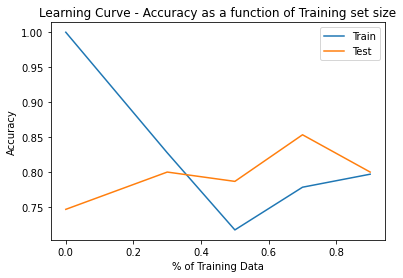

<Figure size 432x288 with 0 Axes>

In [100]:
#df_final_train
#df_final_test
from sklearn.metrics import accuracy_score
X_final = df_final_train.iloc[:,:-1] # Final training Data
X_final_best = selector.transform(X_final)
y_final = df_final_train.iloc[:,-1] # Final Training Data - Outcome Column

thresholds = [0.9,0.7,0.5,0.3,0.00001] # Data thrsholds to Check

# Empty lists to hold results
train_acc =[]
test_acc =[]

for i in thresholds:
    # Split totraining and test data according to threshold
    X_train, X_val, y_train, y_val = train_test_split(X_final_best,y_final, test_size=i, random_state=r_seed)
    # Fit the model with data
    rfR_clf_best.fit(X_train,y_train)
    # Saving Threshold Accuracy - train data
    y_pred_val = rfR_clf_best.predict(X_val)
    train_acc.append(accuracy_score(y_val,y_pred_val))
    
    # Saving Threshold accuracy - test data
    y_pred_test = rfR_clf_best.predict(Xf_best)
    test_acc.append(accuracy_score(yf,y_pred_test))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(thresholds,train_acc, label = "Train")
ax.plot(thresholds,test_acc, label = "Test")

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
plt.xlabel("% of Training Data")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Accuracy as a function of Training set size")
plt.legend()
plt.show()

As we can see there are points in which our model could have been overfitting, since the test and train accuracy both 
reach around 81% at 100% use of the training set we confidently say we are not in overfitting.

# 10. Summary
After getting our best accuracy from our trainig set (84%) and running the model on our final test set our final accuracy is
81.33%. We can see in the learning curve in section 9 that while using 100% of the training set our model is not in a state of
overfitting. Accuracy of 81% is an increase of over 15% from a basic model (initial accuracy of 65%). For future projects we would
recommend collecting more data including more medical tests leading to diabetes and the type of diabetes the patiants are sick
with (predicting type 1 and type 2 are very different).